In [1]:
import pandas as pd
import numpy as np
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import re
import seaborn as sns
import statsmodels.stats.multitest
import copy
import operator
import CPTAC

Loading CPTAC data:
Loading Dictionary...
Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Mutation Data...

 ******PLEASE READ******
CPTAC is a community resource project and data are made available
rapidly after generation for community research use. The embargo
allows exploring and utilizing the data, but the data may not be in a
publication until July 1, 2019. Please see
https://proteomics.cancer.gov/data-portal/about/data-use-agreement or
enter CPTAC.embargo() to open the webpage for more details.


In [2]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()

In [3]:
protein = "ARID1A"
gene = "ARID1A"

genedf = CPTAC.compare_mutations(proteomics, protein, gene)

'''get only cancer patients'''
genedf = genedf.loc[genedf['Patient_Type'] == 'Tumor']
#print(genedf)

missense = 0
truncation = 0
wildtype = 0

for ind, row in genedf.iterrows():
    if row['Mutation'] == "Missense_Mutation":
        genedf.set_value(ind, 'Mutation', 'Missense Mutation')
        missense += 1
    elif row['Mutation'] == "Nonsense_Mutation" or row['Mutation'] == 'Frame_Shift_Ins' or row['Mutation'] == 'Frame_Shift_Del':
        genedf.set_value(ind, 'Mutation', 'Truncation Mutation')
        truncation += 1
    else:
        wildtype += 1
        
print("MISSENSE: ", missense)
print("TRUNCATION: ", truncation)
print("wildtype: ", wildtype)

#print(genedf)


mutation_dict = {}
mutation_dict['Missense'] = missense
mutation_dict['Truncation'] = truncation
mutation_dict['Wildtype'] = wildtype

#print(mutation_dict)

my_dict = {'Mutation': ['Missense','Truncation','Wildtype'],'Number':[missense,truncation,wildtype]}

mutationdf = pd.DataFrame.from_dict(my_dict)
print(mutationdf)


MISSENSE:  5
TRUNCATION:  39
wildtype:  56
     Mutation  Number
0    Missense       5
1  Truncation      39
2    Wildtype      56


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


#### Plot the number of missense, truncation, and wildtype

[Text(0, 0.5, 'Number of Patients in Cohort'),
 Text(0.5, 0, 'Somatic Mutation')]

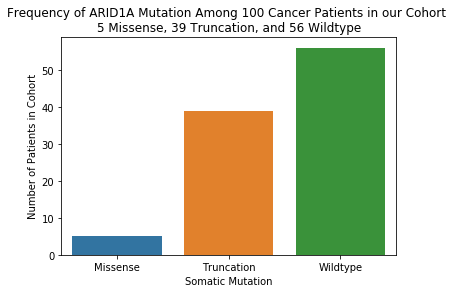

In [4]:
ax = sns.barplot(x="Mutation", y="Number", data=mutationdf)
ax.set_title("Frequency of " + gene +" Mutation Among 100 Cancer Patients in our Cohort \n" + str(missense) + " Missense, " + str(truncation) + " Truncation, and " + str(wildtype) + " Wildtype")
#ax.set_axis_labels("Type of Mutation", "Number of Patients")
ax.set(xlabel='Somatic Mutation', ylabel='Number of Patients in Cohort')